In [1]:
#Step 1: Importing necessary Libraries:

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Step 2: Using pandas to read the dataset into a Dataframe.

df = pd.read_csv(r"E:\Personal\Example Datasets\Games dataset\video_games_sales.csv")

In [3]:
#Step 3: Getting a basic understanding of the dataset

#Checking structure of the dataset
df.info()

#Viewing the first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#Step 4: Cleaning and preparing the data

#Removing rows where Year is blank/unknown
df = df.dropna(subset=["year"])

#Converting column datatypes for efficiency
df["genre"] = df["genre"].astype("category")
df["rank"] = df["rank"].astype(str)

#Abbreviating some game names for better readibility

#Defining function
def game_abbreviator(game_name):
    match game_name:
        case "Grand Theft Auto IV":
            return "GTA IV"
        case "Grand Theft Auto V":
            return "GTA V"
        case "Grand Theft Auto: San Andreas":
            return "GTA San Andreas"
        case "Call of Duty: World at War":
            return "COD WaW"
        case "Call of Duty: Modern Warfare 3":
            return "COD MW3"
        case "Call of Duty: Black Ops II":
            return "COD BO3"
        case "Pokemon Diamond/Pokemon Pearl":
            return "Pokemon D/P"
        case "Pokemon Red/Pokemon Blue":
            return "Pokemon R/B"
        case "Pokemon Gold/Pokemon Silver":
            return "Pokemon G/S"
        case other:
            return game_name

#Applying function to game name column
df["name"] = df["name"].apply(game_abbreviator)


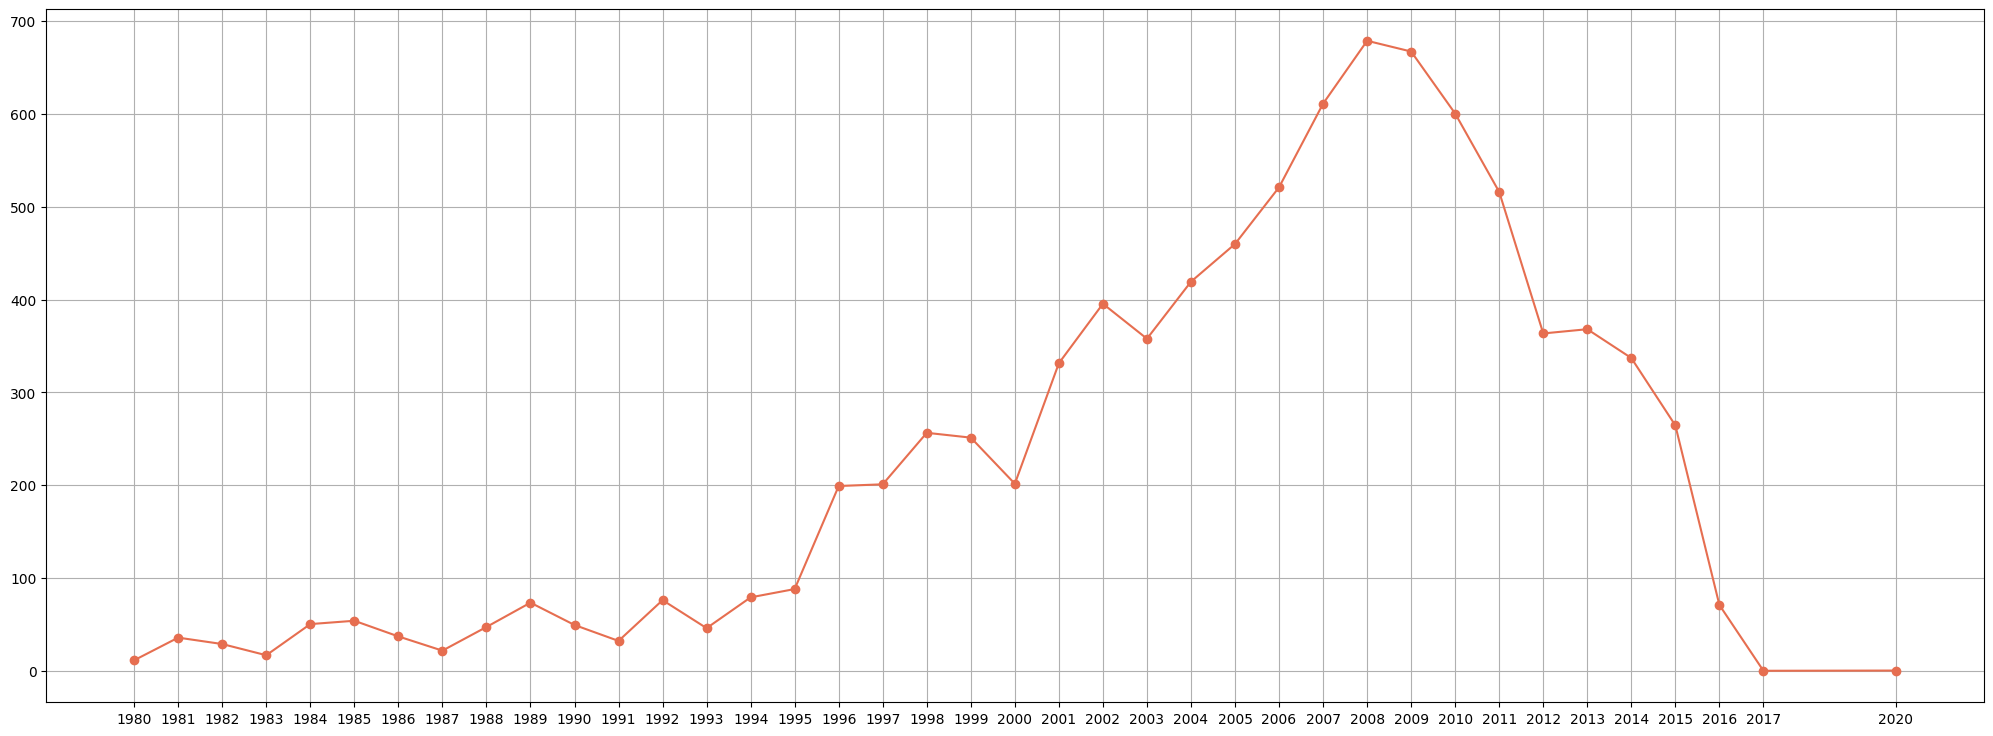

In [5]:
#Step 5: Exploratory data analysis (EDA)

#Analyzing Sales overtime

#Creating a variable to assign sales grouped by Year
sales_overtime = df.groupby("year")["global_sales"].sum()

#Plotting Sales
plt.figure(figsize=(25,9))
plt.xticks(sales_overtime.index)
plt.grid()
plt.plot(sales_overtime.index,sales_overtime.values,color="#e66e50",marker="o")

#Result: 2008 was the year with the highest global sales

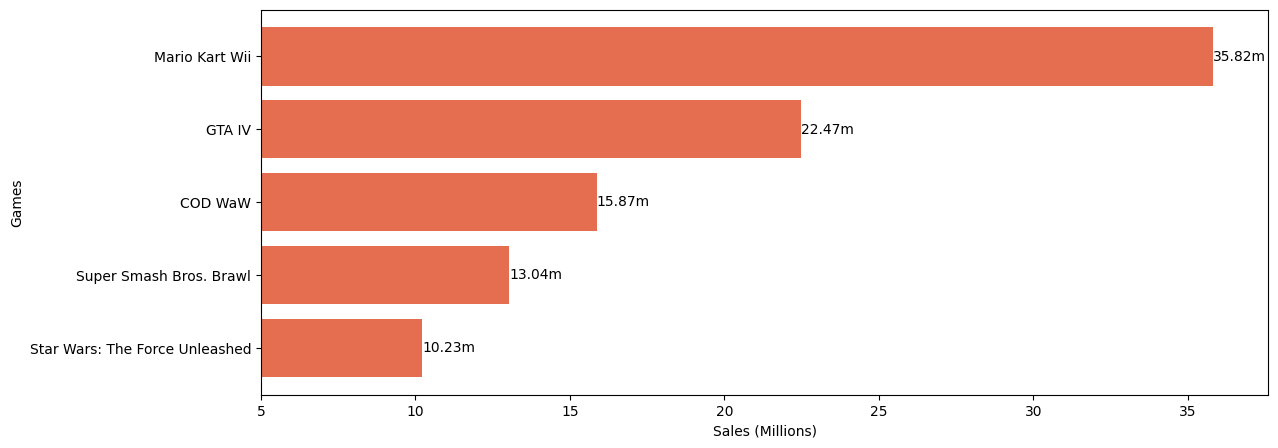

In [6]:
#Lets dive down on 2008's sales to see which were the top selling games!

# Filter the DataFrame for games released in 2008 and sorting by global sales in descending order
df_2008_games = df[df["year"].isin([2008])].sort_values(by="global_sales", ascending=False)

# Display the top games
top_games_in_2008 = df_2008_games.groupby("name")["global_sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(13,5))
plt.barh(top_games_in_2008.head().index,top_games_in_2008.head().values,color="#e66e50")
plt.gca().invert_yaxis()
plt.xlabel("Sales (Millions)")
plt.ylabel("Games")
plt.xlim(5, None)

for i, value in enumerate(top_games_in_2008.head().values):
    plt.text(value, i, f'{value:.2f}m', va='center')

#Result: Mario Kart Wii was the most selling game on 2008


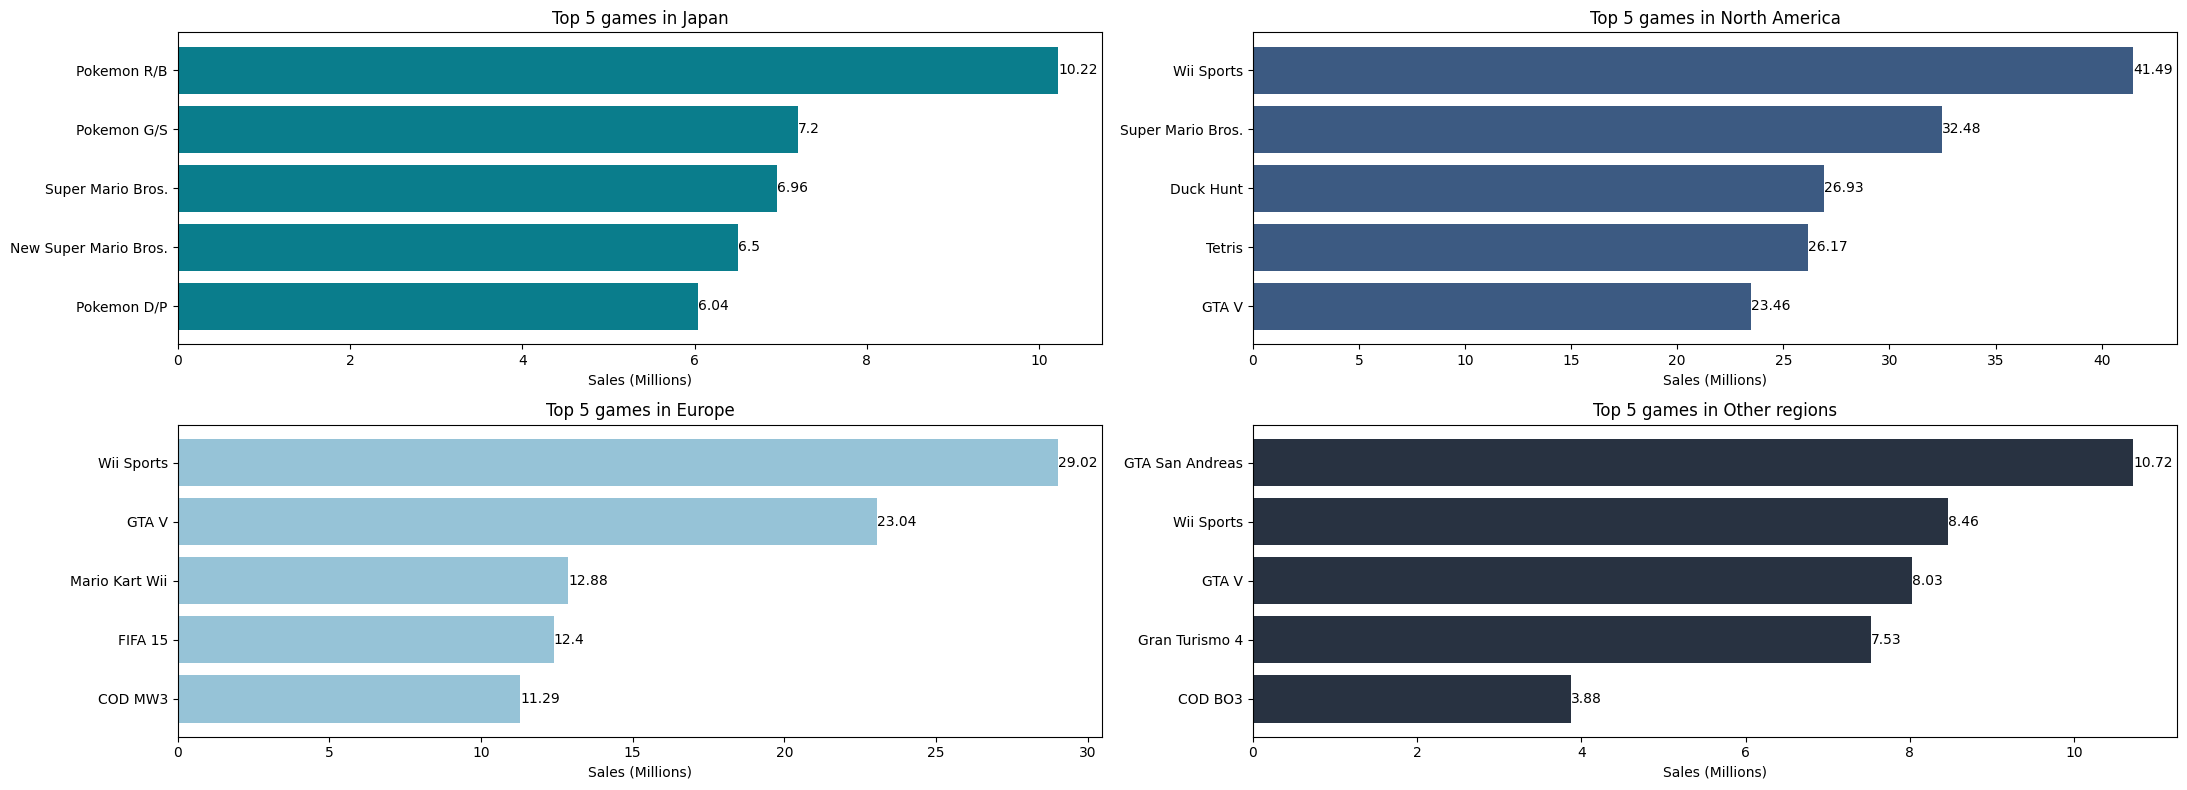

In [7]:
# Group sales data for each region, sort in descending order, and then only show top 5
japan_sales = df.groupby("name")["jp_sales"].sum().sort_values(ascending=False).head()
na_sales = df.groupby("name")["na_sales"].sum().sort_values(ascending=False).head()
eu_sales = df.groupby("name")["eu_sales"].sum().sort_values(ascending=False).head()
other_sales = df.groupby("name")["other_sales"].sum().sort_values(ascending=False).head()

# Create subplots: 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(22, 8))

# Plot Japan sales
bars_japan = axs[0, 0].barh(japan_sales.index, japan_sales.values,color="#0a7d8c")
axs[0, 0].set_title("Top 5 games in Japan")
axs[0, 0].invert_yaxis()
axs[0, 0].bar_label(bars_japan)
axs[0, 0].set_xlabel("Sales (Millions)")

# Plot North America sales
bars_na = axs[0, 1].barh(na_sales.index, na_sales.values,color="#3c5a82")
axs[0, 1].set_title("Top 5 games in North America")
axs[0, 1].invert_yaxis()
axs[0, 1].bar_label(bars_na)
axs[0, 1].set_xlabel("Sales (Millions)")

# Plot Europe sales
bars_eu = axs[1, 0].barh(eu_sales.index, eu_sales.values,color="#96c3d7")
axs[1, 0].set_title("Top 5 games in Europe")
axs[1, 0].invert_yaxis()
axs[1, 0].bar_label(bars_eu)
axs[1, 0].set_xlabel("Sales (Millions)")

# Plot Other regions sales
bars_other = axs[1, 1].barh(other_sales.index, other_sales.values,color="#283241")
axs[1, 1].set_title("Top 5 games in Other regions")
axs[1, 1].invert_yaxis()
axs[1, 1].bar_label(bars_other)
axs[1, 1].set_xlabel("Sales (Millions)")

# Adjust layout to avoid overlap
plt.tight_layout()

#Overall Trends:

# * Regional Differences: There are significant differences in the top-selling games across regions.
# * Dominance of Franchises: Franchises like Pokémon and Grand Theft Auto (GTA) appear multiple times in the top 5 lists, indicating their popularity and longevity.

#Specific Region Analysis:

# * Japan: Pokémon games dominate the list, reflecting their popularity in the region.
# * North America: A mix of classic titles (Super Mario Bros., Duck Hunt) and modern hits (GTA V) make up the top 5.
# * Europe: Wii Sports and FIFA 15 are among the best-selling games, suggesting a preference for sports and family-friendly titles.
# * Other Regions: GTA San Andreas and Wii Sports are popular choices, highlighting their global appeal.

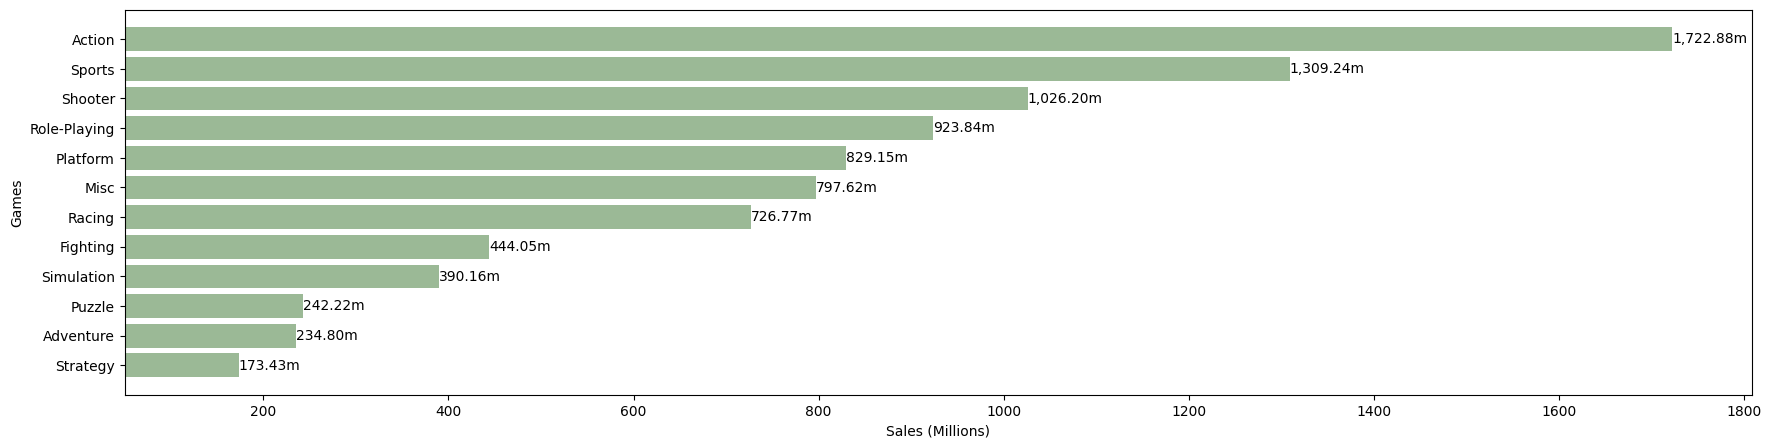

In [8]:
#Genre Analysis

#Global Sales by genres
sales_by_genres = df.groupby("genre",observed=True)["global_sales"].sum().sort_values(ascending=False)
sales_by_genres

#Plotting sales by genres
plt.figure(figsize=(21,5))
plt.barh(sales_by_genres.index,sales_by_genres.values,color="#9bb996")
plt.gca().invert_yaxis()
plt.xlabel("Sales (Millions)")
plt.ylabel("Games")
plt.xlim(50, None)

#Adding value labels to bars
for i, value in enumerate(sales_by_genres.values):
    plt.text(value, i, f'{value:,.2f}m', va='center')

#Dominant Genres:

# * Action: The "Action" genre is the clear leader, with sales significantly surpassing all other categories.
# * Sports and Shooter: These genres also have substantial market shares, suggesting strong popularity among gamers.

#Mid-Range Genres:

# * Role-Playing, Platform, and Misc: These genres occupy the middle ground, with sales ranging between 700 and 900 million units.
# * Racing and Fighting: While not as dominant, these genres still have a significant presence in the market.

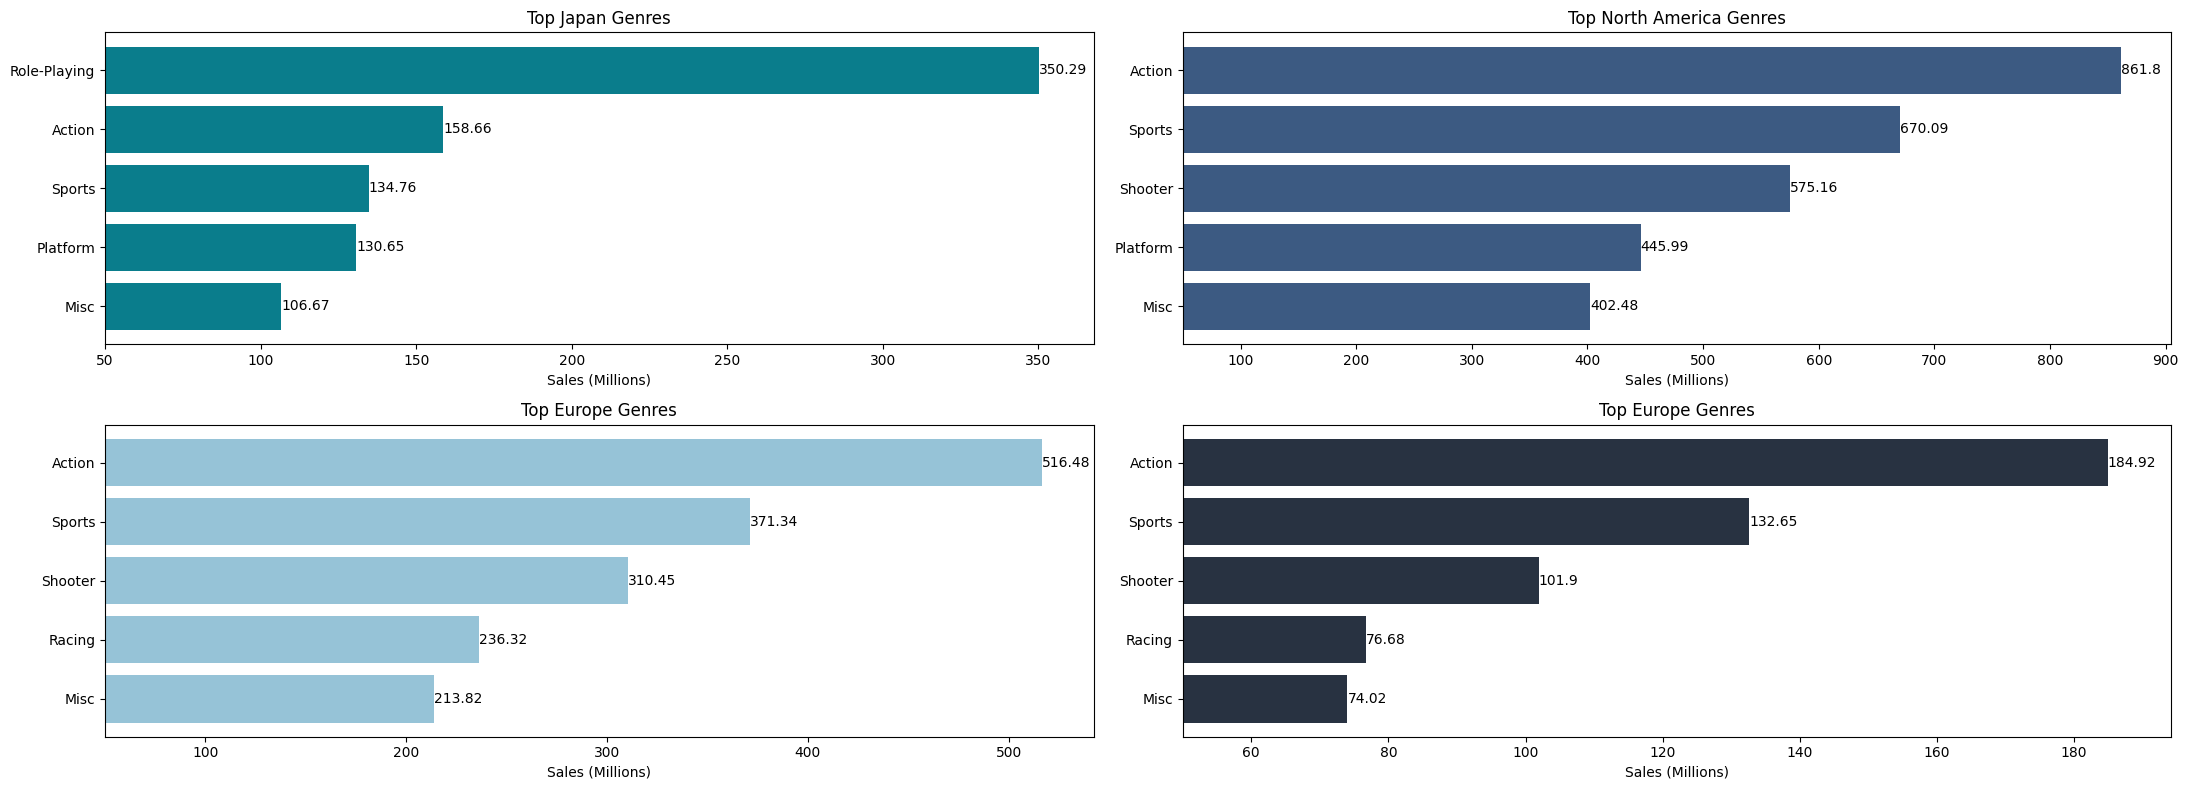

In [9]:
# Group and sort sales data for each region
top_japan_genres = df.groupby("genre", observed=True)["jp_sales"].sum().sort_values(ascending=False).head()
top_na_genres = df.groupby("genre", observed=True)["na_sales"].sum().sort_values(ascending=False).head()
top_eu_genres = df.groupby("genre", observed=True)["eu_sales"].sum().sort_values(ascending=False).head()
top_other_genres = df.groupby("genre", observed=True)["other_sales"].sum().sort_values(ascending=False).head()

#Creating subplot dimensions
fig, axs = plt.subplots(2, 2,figsize = (22, 8))

#Plot japan top Genres
japan_bars = axs[0, 0].barh(top_japan_genres.index,top_japan_genres.values,color="#0a7d8c")
axs[0, 0].set_title("Top Japan Genres")
axs[0, 0].invert_yaxis()
axs[0, 0].set_xlabel("Sales (Millions)")
axs[0, 0].bar_label(japan_bars)
axs[0, 0].set_xlim(50, None)

#Plot na top Genres
na_bars = axs[0, 1].barh(top_na_genres.index,top_na_genres.values,color="#3c5a82")
axs[0, 1].set_title("Top North America Genres")
axs[0, 1].invert_yaxis()
axs[0, 1].set_xlabel("Sales (Millions)")
axs[0,1].bar_label(na_bars)
axs[0, 1].set_xlim(50, None)

#Plot eu top Genres
eu_bars =axs[1, 0].barh(top_eu_genres.index,top_eu_genres.values,color="#96c3d7")
axs[1, 0].set_title("Top Europe Genres")
axs[1, 0].invert_yaxis()
axs[1, 0].bar_label(eu_bars)
axs[1, 0].set_xlabel("Sales (Millions)")
axs[1, 0].set_xlim(50, None)

#Plot other top Genres
other_region_bars = axs[1, 1].barh(top_other_genres.index,top_other_genres.values,color="#283241")
axs[1, 1].set_title("Top Europe Genres")
axs[1, 1].bar_label(other_region_bars)
axs[1, 1].invert_yaxis()
axs[1, 1].set_xlabel("Sales (Millions)")
axs[1, 1].set_xlim(50, None)

#Avoid overlap
plt.tight_layout()

#Overall Trends:

# * Action is the most popular genre across all regions, consistently topping the charts. This suggests a strong demand for action-oriented games.
# * Sports is another consistently popular genre, particularly in North America and Europe.
# * Shooter games are also well-received, especially in North America.

#Regional Differences:

# * Japan: While Action remains the top genre, Sports and Platform games are also significantly popular.
# * North America: Shooter games are particularly popular, along with Sports and Action.
# * Europe: Action and Sports are the dominant genres, followed by Shooter games.

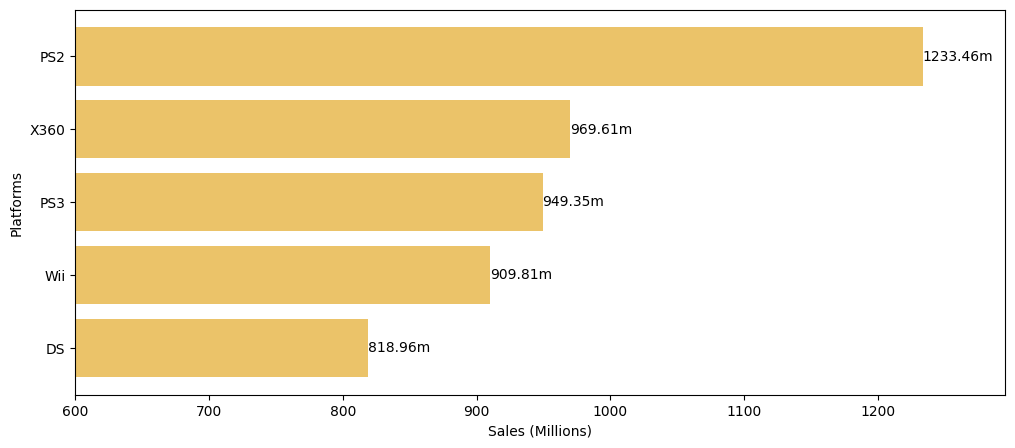

In [10]:
#Platform Analysis

#Grouping global sales by platform
platforms_sales = df.groupby("platform")["global_sales"].sum().sort_values(ascending=False).head()

#Creating plot
plt.figure(figsize=(12,5))
plt.barh(platforms_sales.index,platforms_sales.values,color="#ebc369")
plt.gca().invert_yaxis()
plt.xlabel("Sales (Millions)")
plt.ylabel("Platforms")
plt.xlim(600,None)

#Adding value labels
for i, value in enumerate(platforms_sales.values):
    plt.text(value, i, f'{value:.2f}m', va='center')

#Result

# * Sony's PlayStation platforms have consistently performed well, with the PS2 and PS3 both making it to the top 5.
# * The PS2, in particular, has achieved the highest sales, demonstrating its enduring popularity.
# * The Xbox 360, while not topping the list, has secured a significant position among the top sellers, this indicates Microsoft's competitive presence in the video game market.
# *Nintendo's Wii and DS platforms have also made the cut, showcasing their appeal to a wide audience. These platforms likely benefited from their unique gameplay mechanics and family-friendly focus.